# The Sparks Foundation - Data Science & Business Analytics Internship


### Batch  : May 2022

### Name  : Anushree K

### Task 6 : Prediction using Decision Tree Algorithm

### Level  : Intermediate

* The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

* Create the Decision Tree classifier and visualize it graphically


__Dataset__ : https://bit.ly/3kXTdox

###  Importing the necessary libraries for the task :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.datasets import load_iris


from sklearn import tree

In [2]:
iris = pd.read_csv("iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 6)

There are 150 datapoints and a total of 6 columns.

In [4]:
# Checking the number of columns present
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### Checking out the null Values in the dataset


In [6]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Training the Model


In [7]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

# Create features matrix
x = iris.loc[:, features].values

In [8]:
y =iris.Species

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=0)

### Decision Tree Algorithm

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [17]:
model = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [18]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [19]:
model.predict(x_test[0:1])

array(['Iris-setosa'], dtype=object)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics

In [21]:
score = model.score(x_test, y_test)
print(score)

0.9473684210526315


In [22]:
print(metrics.classification_report(y_test,model.predict(x_test)))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.83      0.91        12

       accuracy                           0.95        38
      macro avg       0.96      0.94      0.95        38
   weighted avg       0.95      0.95      0.95        38



### Visualizing the data



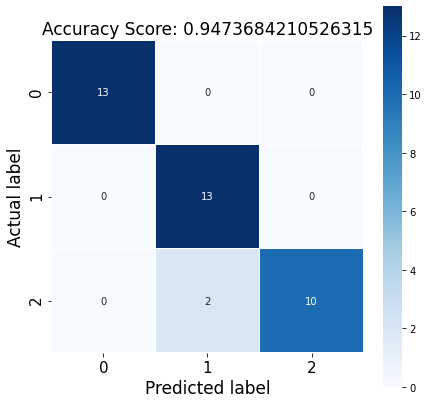

In [23]:
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

In [24]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(x_train, y_train)

    score = clf.score(x_test, y_test)
    accuracy.append(score)

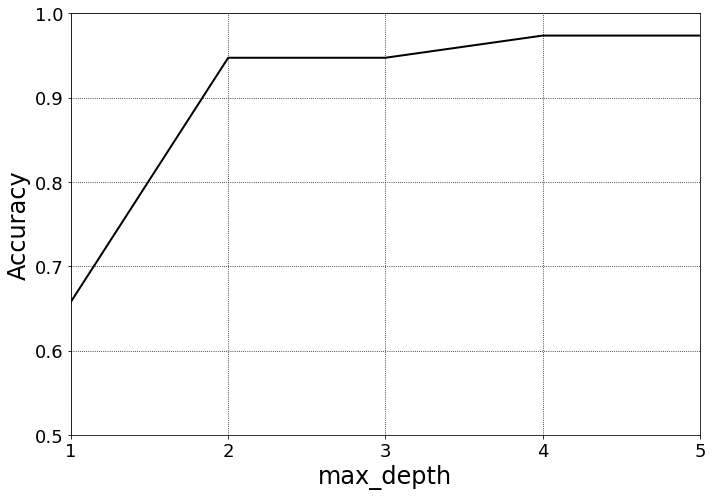

In [25]:
#ploting accuracy score depth wise
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')


ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()
#fig.savefig('images/max_depth_vs_accuracy.png', 

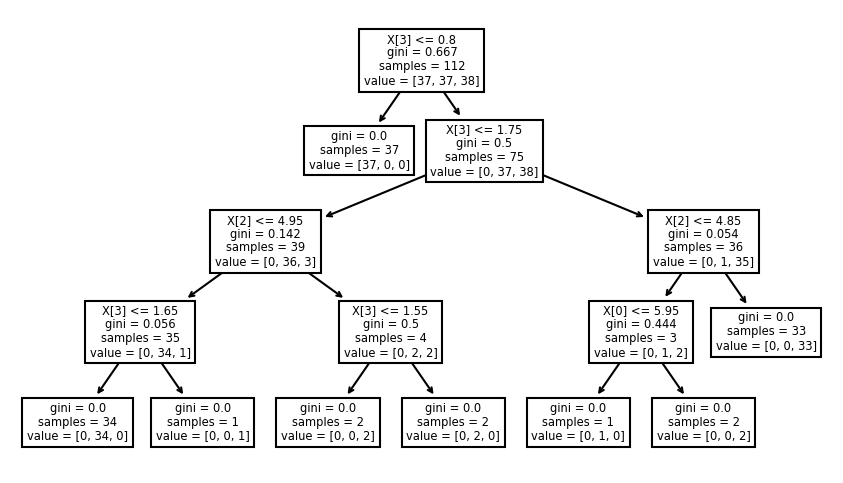

In [26]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 150)

tree.plot_tree(clf);

In [27]:
# Putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

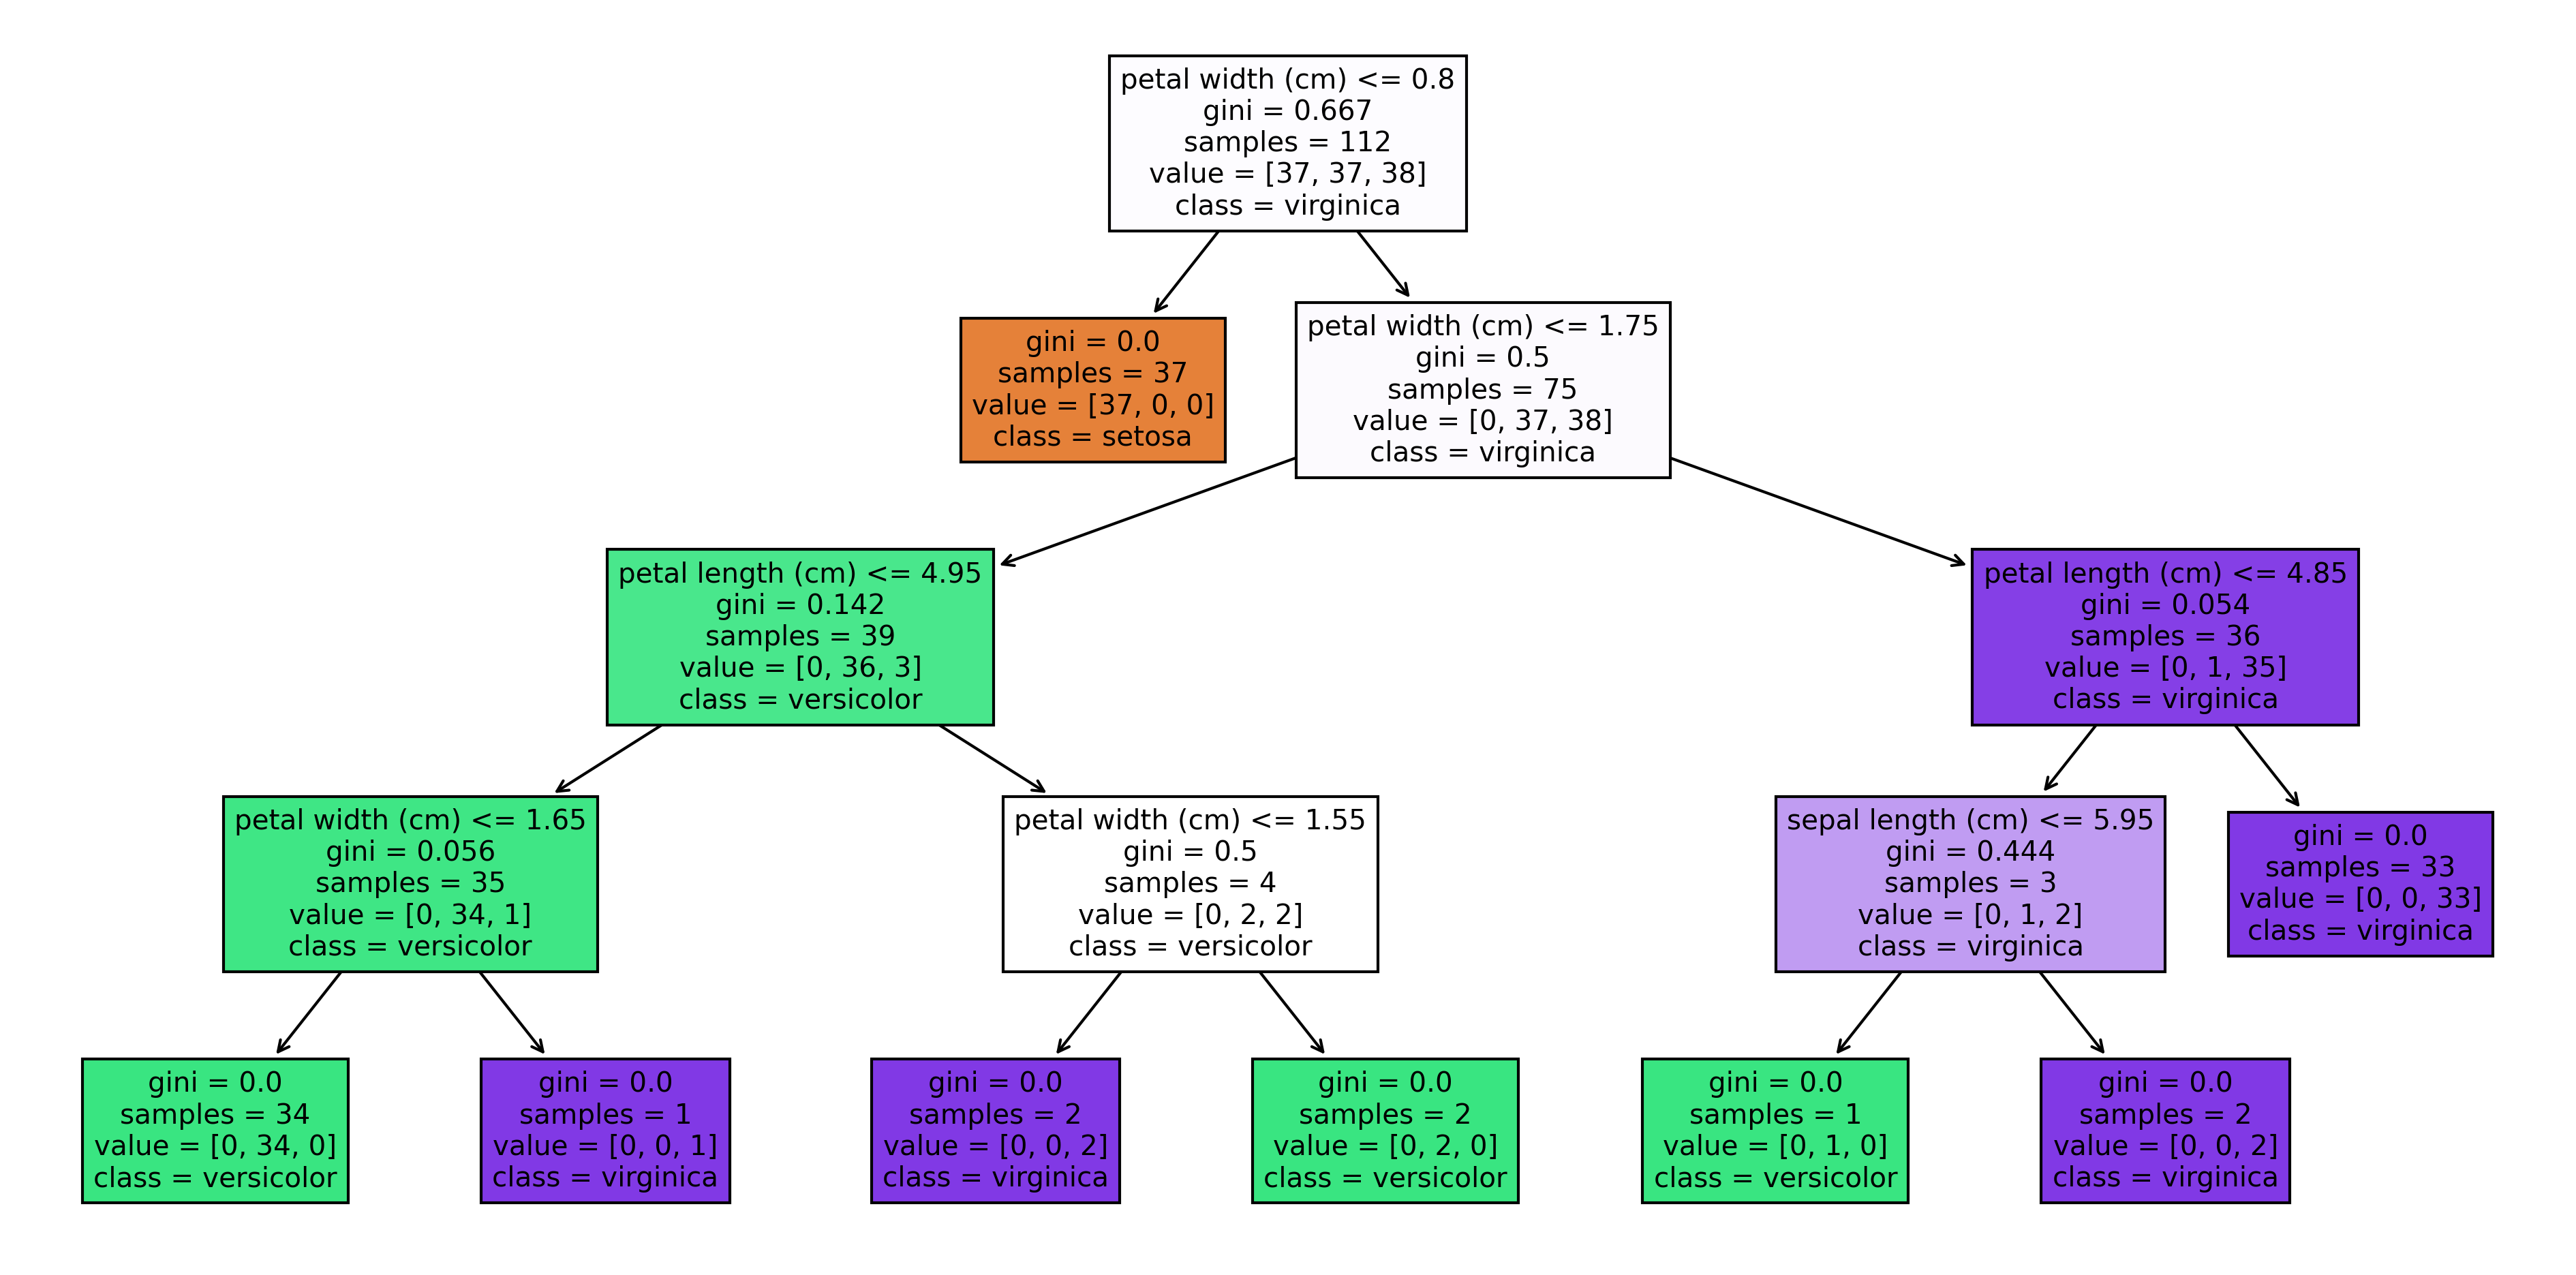

In [28]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16,8),dpi=300)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('images/plottreefncn.png')

### Conclusion :


* After Importing, Fit our dataset in our model, accuracy is 94.73%.

* We can clearly see model performance by confusion matrix and classification report.

* By ploting accuracy score depth wise graph, optimal depth for model is 4.

### Thankyou